In [1]:
import pandas as pd #data preprocessing
import numpy as np #calc
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
from sklearn.model_selection import train_test_split #spliting
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("adult.csv")
data.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [3]:
## checking if null values are present in the dataset
## if there are null values than they should be removed by mean, meadian,0,or anything according to dataset.
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [4]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
data.describe() #desccriptive statistics
#50% also called second quartile or meadian
# if diff b/w mean and meadian is more the more is the no. of outliers

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<Axes: xlabel='income', ylabel='count'>

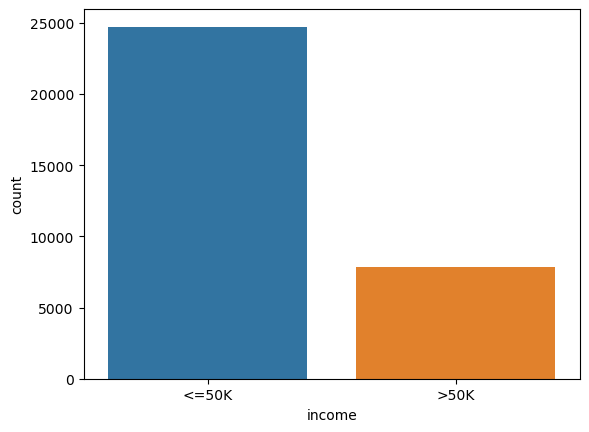

In [7]:
sns.countplot(x="income",data = data)
#data is unbalanced 

In [8]:
data["income"].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [9]:
print("<=50k =",round((24720/32561)*100,2),"%")
print(">50k =",round((7841/32561)*100,2),"%")
#calculating percentage

<=50k = 75.92 %
>50k = 24.08 %


### handling numerical vlaues

In [10]:
numerical = [i for i in data.columns if data[i].dtypes == "int64"]

In [11]:
numerical

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

In [12]:
print("No of unique value in each column with dtype integer :- \n")
for feature in numerical:
    print(feature,"=",len(data[feature].unique()))

No of unique value in each column with dtype integer :- 

age = 73
fnlwgt = 21648
education.num = 16
capital.gain = 119
capital.loss = 92
hours.per.week = 94


In [13]:
#number of unique values in education is very less so its distribution can be disctrete
data["education.num"].unique()

array([ 9, 10,  4,  6, 16, 15, 13, 14,  7, 12, 11,  2,  3,  8,  5,  1])

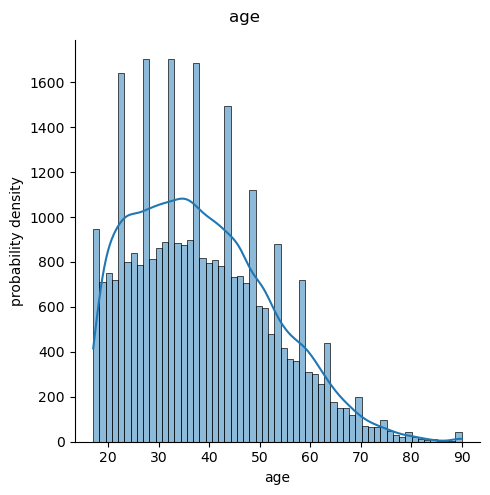

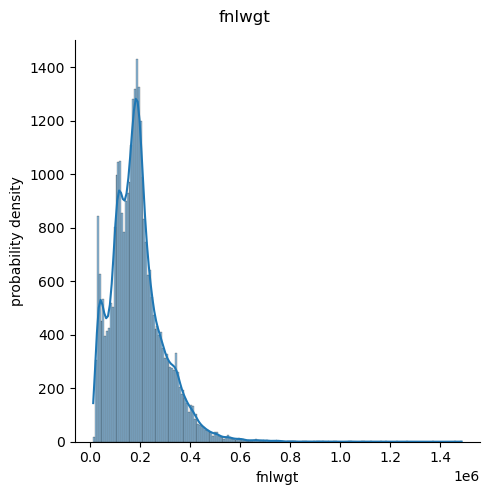

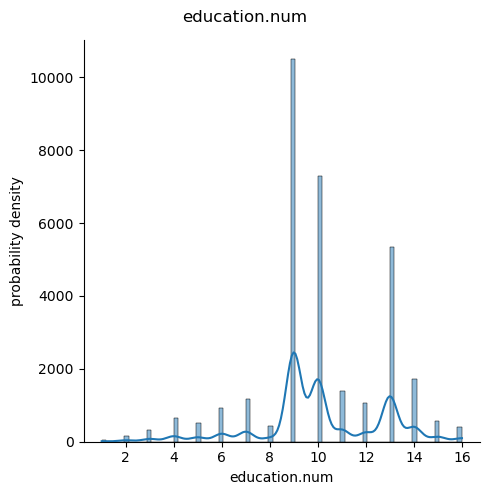

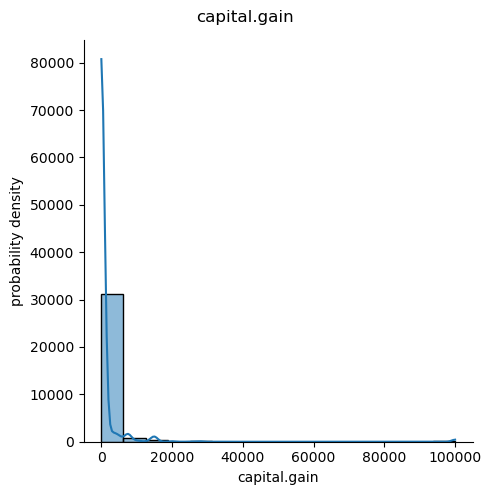

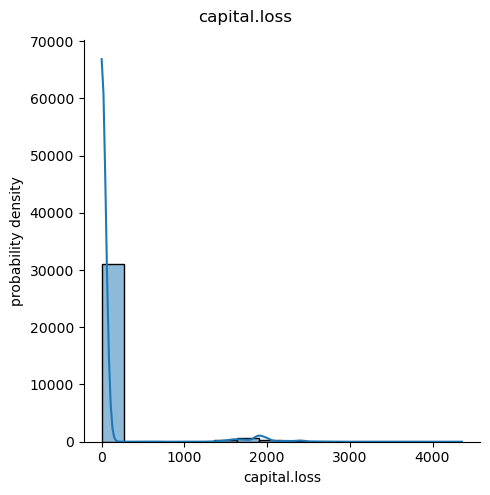

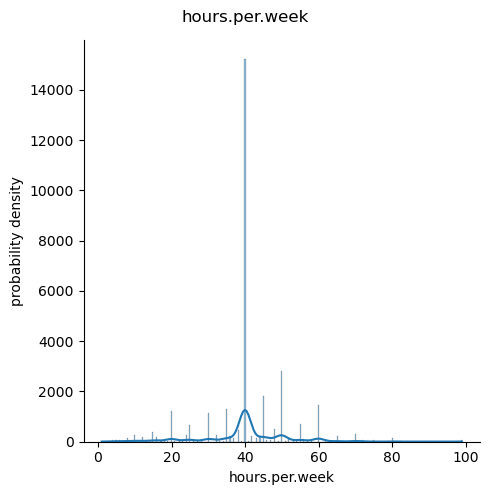

In [14]:

## To learn displot : https://www.google.com/search?q=sns+countplot+vs+displot&oq=sns+countplot+vs+displot&aqs=chrome..69i57.5835j0j1&sourceid=chrome&ie=UTF-8#fpstate=ive&vld=cid:01156907,vid:4DA_dgc521o
## ifo about skewness and some more terms used : https://deffro.github.io/tutorials/visualizations-with-seaborn/
for feature in numerical:
    bar = sns.displot(x=feature,data=data,kde= "true")
    bar.fig.subplots_adjust(top=0.92)
    bar.fig.suptitle(feature)
    plt.ylabel("probability density")
    plt.show()
    

In [15]:
for feature in numerical:
    print("skewness and Kurtosis for",feature,":")
    print("Skewness: {:.3f}".format(data[feature].skew()))
    print("Kurtosis: {:.3f}". format(data[feature].kurt()),"\n")
# higher skewed data means the data is not evenly distributed
# to solve this we can apply log on features with less or no 0s

skewness and Kurtosis for age :
Skewness: 0.559
Kurtosis: -0.166 

skewness and Kurtosis for fnlwgt :
Skewness: 1.447
Kurtosis: 6.219 

skewness and Kurtosis for education.num :
Skewness: -0.312
Kurtosis: 0.623 

skewness and Kurtosis for capital.gain :
Skewness: 11.954
Kurtosis: 154.799 

skewness and Kurtosis for capital.loss :
Skewness: 4.595
Kurtosis: 20.377 

skewness and Kurtosis for hours.per.week :
Skewness: 0.228
Kurtosis: 2.917 



In [16]:
data['age']  = np.log(data['age'])
data['fnlwgt']  = np.log(data['fnlwgt'])

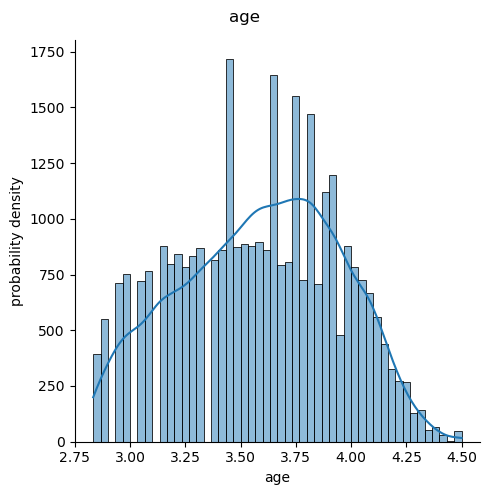

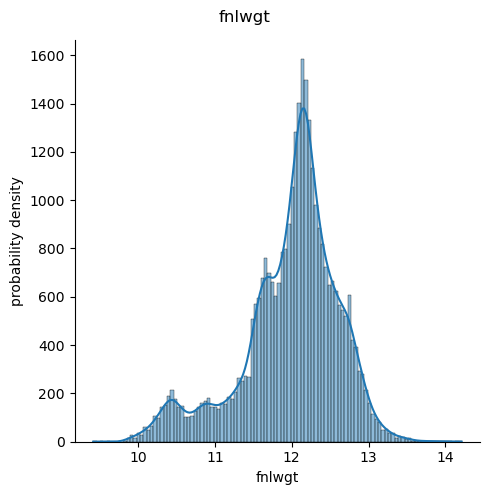

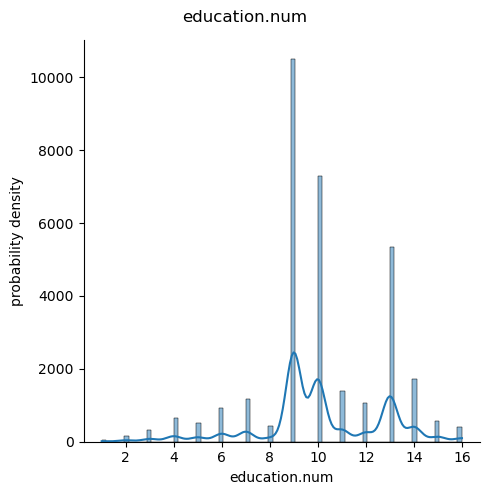

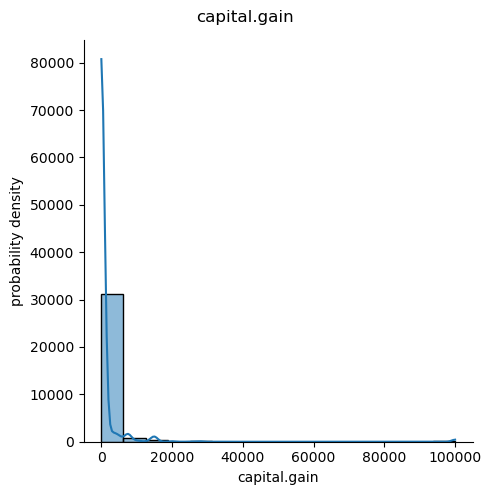

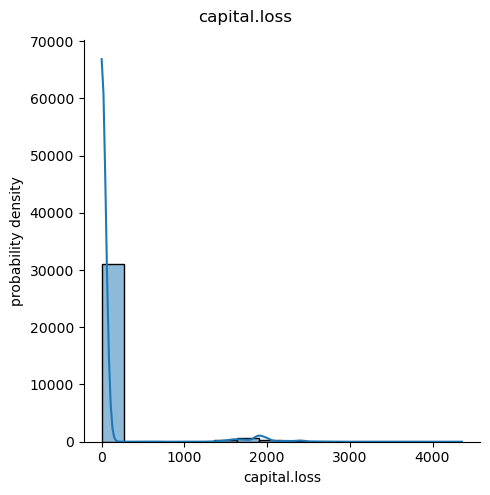

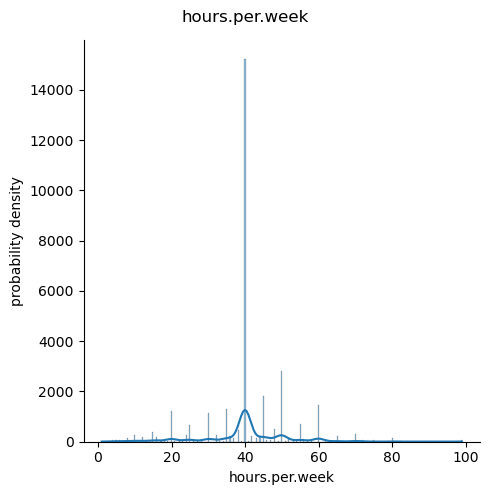

In [17]:
for feature in numerical:
    bar = sns.displot(x=feature,data=data,kde= "true")
    bar.fig.subplots_adjust(top=0.92)
    bar.fig.suptitle(feature)
    plt.ylabel("probability density")
    plt.show()

### handling catagorical vlaues

In [18]:
# checked in info totoal 9 categorical features

categorical = [i for i in data.columns if data[i].dtypes == "O"]
categorical

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

In [19]:
print("No of unique value in each column in categorical :- \n")
for feature in categorical:
    print(feature,"=",len(data[feature].unique()))

No of unique value in each column in categorical :- 

workclass = 9
education = 16
marital.status = 7
occupation = 15
relationship = 6
race = 5
sex = 2
native.country = 42
income = 2


In [20]:
for feature in categorical:
    print((data[feature].value_counts()))

#some question marks are present values need to handle them.

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         377

### handeling missing values

In [21]:
print("workclass =",round((1836/32561)*100,2),"%")
print("occupation =",round((1843/32561)*100,2),"%")
print("native.country =",round((583/32561)*100,2),"%")

workclass = 5.64 %
occupation = 5.66 %
native.country = 1.79 %


In [22]:
## very less percentage so can fill with mode 
## if percentage is more htan filling it with mode than it makes data biased

data["workclass"].mode()[0]
data["occupation"].mode()[0]
data["native.country"].mode()[0]

'United-States'

In [23]:
## converting data to simpler form 

data["education"].replace(["Preschool", "5th-6th", "1st-4th","7th-8th", "9th", "10th", "11th", "12th"], "school", 
                        inplace = True, regex = True)
data["education"].replace(["Prof-school", "Assoc-voc","Some-college", "Assoc-acdm"], "higher", 
                        inplace = True, regex = True)

data["marital.status"].replace(["Married-civ-spouse", "Married-AF-spouse"], "married", 
                        inplace = True, regex = True)
data["marital.status"].replace(["Divorced", "Separated", "Widowed", "Married-spouse-absent"], "other", 
                        inplace = True, regex = True)

In [24]:
data["income"] = data["income"].replace({ '<=50K' : 0, '>50K' : 1 },regex = True)

In [25]:
data.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,4.499810,?,11.252249,HS-grad,9,other,?,Not-in-family,White,Female,0,4356,40,United-States,0
1,4.406719,Private,11.797126,HS-grad,9,other,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,4.189655,?,12.133830,higher,10,other,?,Unmarried,Black,Female,0,4356,40,United-States,0
3,3.988984,Private,11.851959,school,4,other,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,3.713572,Private,12.486213,higher,10,other,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,3.526361,Private,12.287026,HS-grad,9,other,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,3.637586,Private,11.922389,school,6,other,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0
7,4.304065,State-gov,11.392316,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,1
8,4.219508,Federal-gov,12.952791,HS-grad,9,other,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,0
9,3.713572,Private,11.156779,higher,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,1


In [26]:
print("No of unique value in each column in categorical :- \n")
for feature in categorical:
    print(feature,"=",len(data[feature].unique()))

No of unique value in each column in categorical :- 

workclass = 9
education = 6
marital.status = 3
occupation = 15
relationship = 6
race = 5
sex = 2
native.country = 42
income = 2


In [27]:
data["education"].unique()

array(['HS-grad', 'higher', 'school', 'Doctorate', 'Bachelors', 'Masters'],
      dtype=object)

/var/folders/g4/l_dsr6r17tg530syqgkwkllr0000gq/T/ipykernel_4829/4169935202.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True);


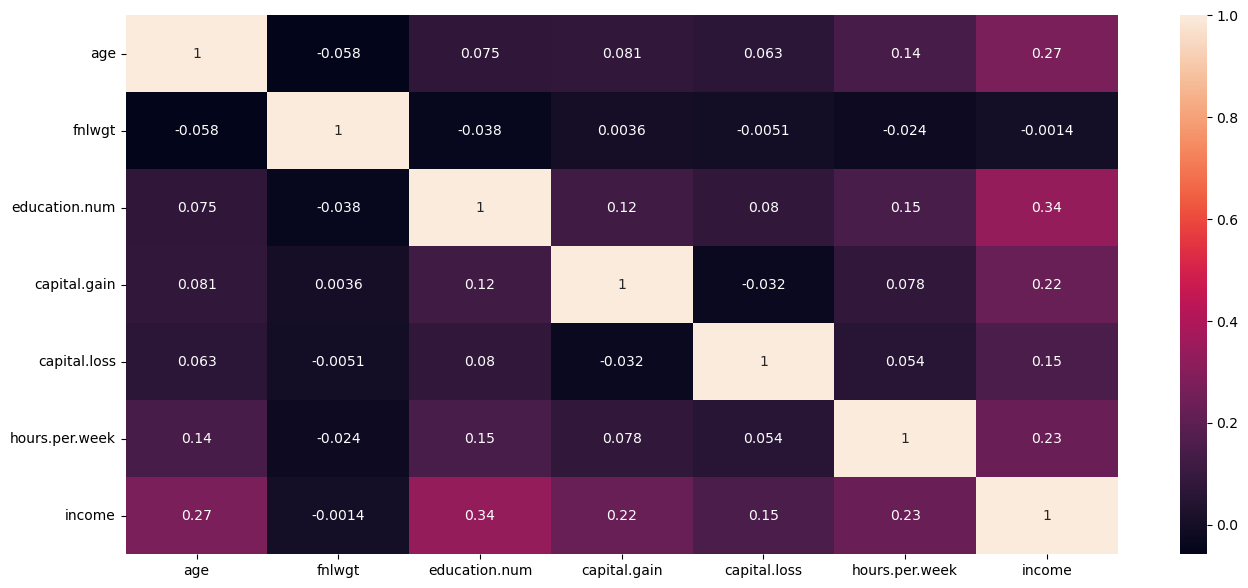

In [28]:
## check corelation between the features
plt.figure(figsize = (16,7))
sns.heatmap(data.corr(), annot=True);

In [29]:
## fnlwgt has very less corr to salary. ..but we cannot drop it as salary
## is not continous variable
## So now we should check correlation between other independent variables

In [30]:
data = data.apply(LabelEncoder().fit_transform)
data.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,72,0,2649,2,8,2,0,1,4,0,0,91,39,39,0
1,65,4,6514,2,8,2,4,1,4,0,0,91,17,39,0
2,49,0,11175,4,9,2,0,4,2,0,0,91,39,39,0
3,37,4,7009,5,3,2,7,4,4,0,0,90,39,39,0
4,24,4,16850,4,9,2,10,3,4,0,0,90,39,39,0
5,17,4,14182,2,8,2,8,4,4,0,0,89,44,39,0
6,21,4,7800,5,5,2,1,4,4,1,0,89,39,39,0
7,57,7,3183,1,15,0,10,2,4,0,0,88,19,39,1
8,51,1,20872,2,8,2,10,1,4,0,0,88,39,39,0
9,24,4,2360,4,9,0,3,4,4,1,0,87,59,0,1


In [36]:
data_X = data.iloc[:,:-1]
data_Y = data["income"]
x_train, x_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.20, random_state=42)

In [37]:
print(x_train.shape)
print(x_test.shape)

(26048, 14)
(6513, 14)


In [38]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [39]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [58]:
##logistic regression 

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight="balanced") #bcs data is unbalanced
# lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
accuracy_score(y_test,pred)

0.763549823430063

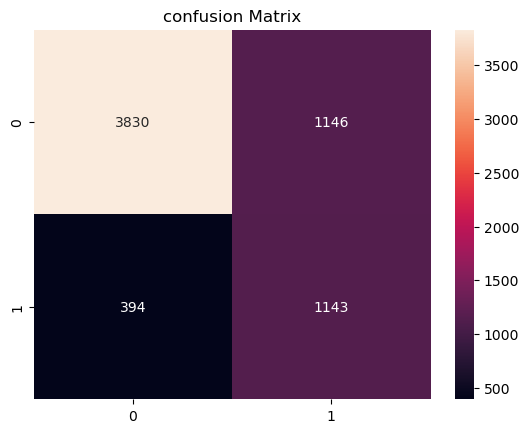

In [59]:
confmtrx = confusion_matrix(y_test,pred)
plt.title("confusion Matrix")
sns.heatmap(confmtrx, annot = True, fmt = "d")
plt.show()

In [60]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83      4976
           1       0.50      0.74      0.60      1537

    accuracy                           0.76      6513
   macro avg       0.70      0.76      0.72      6513
weighted avg       0.81      0.76      0.78      6513



In [61]:
## RAMDOM FOREST 

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 20, criterion = 'entropy' ,random_state = 51)
rf.fit(x_train,y_train)
rfpred = rf.predict(x_test)
accuracy_score(y_test,rfpred)
#ensemble learning   **


0.8489175495163519

In [65]:
print(classification_report(y_test,rfpred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4976
           1       0.72      0.59      0.65      1537

    accuracy                           0.85      6513
   macro avg       0.80      0.76      0.78      6513
weighted avg       0.84      0.85      0.84      6513



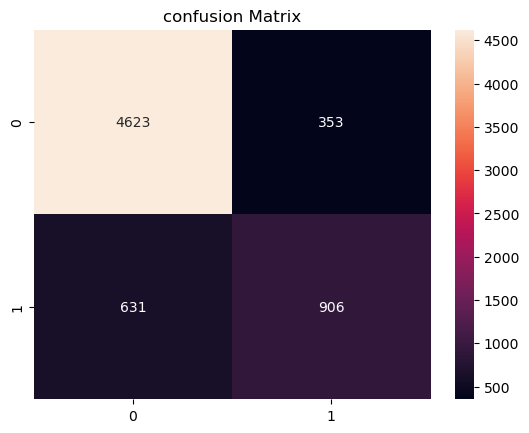

In [66]:
confmtrx = confusion_matrix(y_test,rfpred)
plt.title("confusion Matrix")
sns.heatmap(confmtrx, annot = True, fmt = "d")
plt.show()

In [ ]:
## hyper parameter tunning ** 